In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [15]:
Data = pd.read_excel(r"C:\Users\ACER\Desktop\Udaanous\Python\Python PDF\practice_data.xlsx")
Data1 = pd.DataFrame(Data)
Data1.head(5)

,EmployeeID,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes


# Kdeplot on Sales Revenue Generated & Days Present

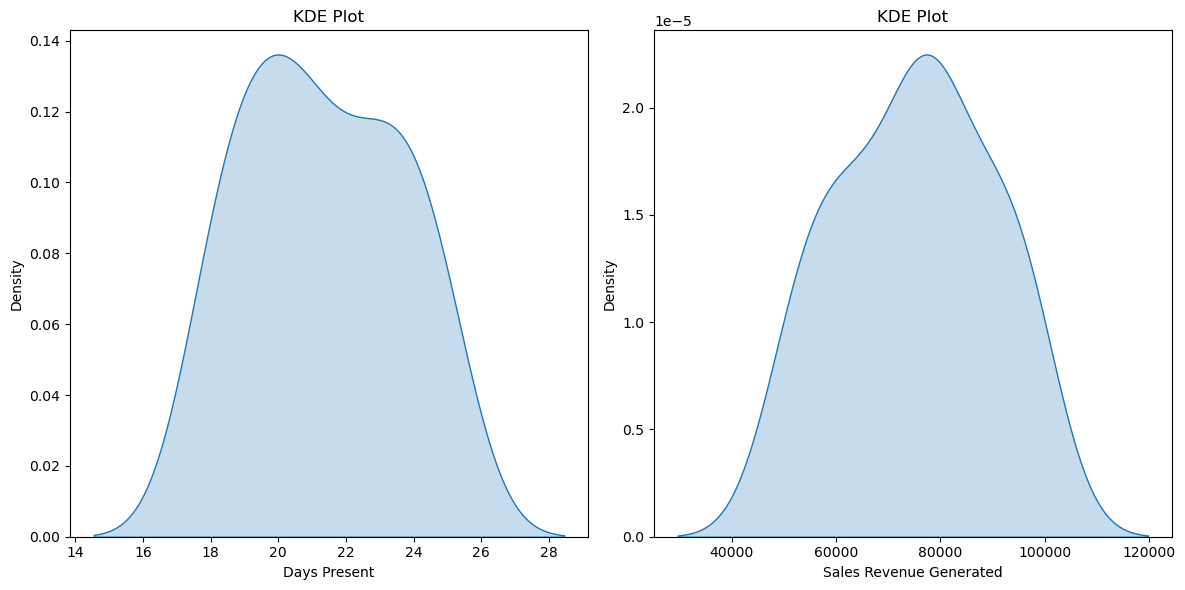

In [11]:
numeric_columns = ["Days Present","Sales Revenue Generated"]
fig, axes = plt.subplots(1,2,figsize=(12,6))
#axes = axes.flatten()
for index, column in enumerate(numeric_columns):
    sns.kdeplot(Data[column],ax=axes[index],fill=True)
    axes[index].set_title("KDE Plot")
plt.tight_layout()
plt.show()

In [9]:
Highest_number = Data1["Sales Revenue Generated"].max()
print("Highest_number",Highest_number)

Highest_number 97797


In [19]:
from scipy.stats import boxcox
from scipy.stats import shapiro

# boxcox_transformation

Axes(0.125,0.11;0.775x0.77)
p_value: 0.014791046269237995


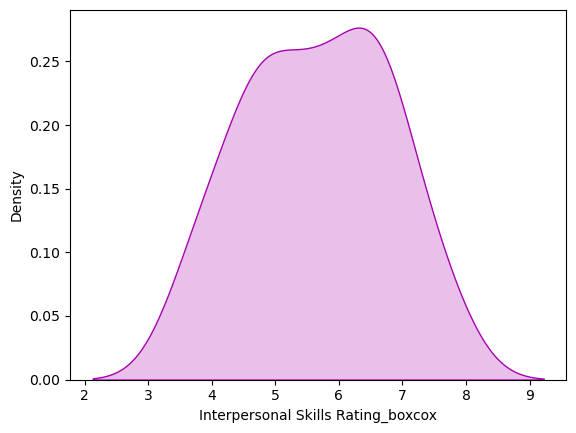

In [63]:
def boxcox_transformation(data, column_name):
    transformed_data, _ = boxcox(data[column_name])
    data[f"{column_name}_boxcox"] = transformed_data
    stat, p_value = shapiro(data[f"{column_name}_boxcox"])
    kdeplot = sns.kdeplot(data[f"{column_name}_boxcox"],fill=True, color='#A604AE')
    print(kdeplot)
    print("p_value:",p_value)

DF = pd.read_excel(r"C:\Users\ACER\Desktop\Udaanous\Python\Python PDF\practice_data.xlsx")
boxcox_transformation(DF,"Interpersonal Skills Rating")

# yeojohnson_transformation

<Axes: xlabel='Decision-Making Skills Rating_yeojohnson', ylabel='Density'>

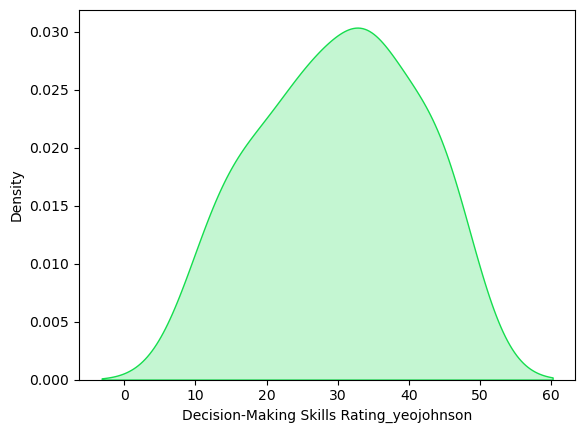

In [65]:
from scipy.stats import yeojohnson
def yeojohnson_transformation(data, column_name):
    transformed_data, _ = yeojohnson(data[column_name])
    data[f"{column_name}_yeojohnson"] = transformed_data
    stat, p_value = shapiro(data[f"{column_name}_yeojohnson"])
    kdeplot = sns.kdeplot(data[f"{column_name}_yeojohnson"],fill=True, color='#15DD4E')
    return kdeplot
    return "p_value:",p_value

Df = pd.DataFrame(Data1)
yeojohnson_transformation(Df,"Decision-Making Skills Rating")

# One+Sample+ttest

In [40]:
from scipy import stats
hypothesis_mean = 68
t_statistic, p_value = stats.ttest_1samp(Data1["Interpersonal Skills Rating"],hypothesis_mean)
print("P-value",p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the average Interpersonal Skills Rating and 68.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the average Interpersonal Skills Rating and 68.")


P-value 1.0318380146847296e-52
Reject the null hypothesis. There is a significant difference between the average Interpersonal Skills Rating and 68.


# independent+sample+ttest

In [51]:
churned = Data1.query('churned == "Yes"')["Sales Revenue Generated"]
existing = Data1.query('churned == "No"')['Sales Revenue Generated']
t_statistic, p_value = stats.ttest_ind(churned, existing)
print("P-value:", p_value)

alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average purchase amount between churned and existing customers.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average purchase amount between churned and existing customers.")

P-value: 0.5653556952507652
Fail to reject the null hypothesis. There is no significant difference in average purchase amount between churned and existing customers.


# one+way+anova

In [60]:
Data1["department"].unique()

array(['Sales', 'Marketing', 'Human Resources', 'Engineering', 'Finance'],
      dtype=object)

In [61]:
Sales = Data1.query('department == "Sales"')['Task Completion Rates']
Marketing = Data1.query('department == "Marketing"')['Task Completion Rates']
Human_Resources = Data1.query('department == "Human Resources"')['Task Completion Rates']
Engineering = Data1.query('department == "Engineering"')['Task Completion Rates']
Finance = Data1.query('department == "Finance"')['Task Completion Rates']

t_statistic, p_value = stats.f_oneway(Sales, Marketing, Human_Resources, Engineering, Finance)
print("P-value:", p_value)
                                                   
alpha = 0.05 
if p_value < alpha:
    print('Reject the null hypothesis. There is a significant difference in average frequency of purchases among the customers from different cities.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in average frequency of purchases among the customers from different cities.')

P-value: 0.592585693937975
Fail to reject the null hypothesis. There is no significant difference in average frequency of purchases among the customers from different cities.
